# Análisis y visualización de datos abiertos con python
# Extra A: Estadística intermedia

In [1]:
# ! pip install scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

El dataset breast_cancer de scikit-learn es un conjunto de datos de cáncer de mama, que contiene información clínica y características de células de tumor para 569 pacientes. El objetivo del conjunto de datos es predecir si un tumor es benigno o maligno en función de estas características.

Las características de las células del tumor se calculan a partir de imágenes digitales de muestras de tejido de tumor de mama. En total, hay 30 características diferentes, que incluyen el radio, la textura, la simetría, la concavidad y otras medidas de la forma y el tamaño de las células del tumor. Para cada paciente, se proporciona un identificador único, la etiqueta de clase (benigno o maligno) y los valores de las 30 características.

Veamos la descripción del dataset.

In [2]:
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Ahora convertiremos los datos en un dataframe.

**Nota** En este conjunto de datos: 0:'maligno', 1:'benigno'

In [3]:
df_cancer = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df_cancer['diagnostic'] = cancer['target']
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Exploremos rápidamente los datos

In [4]:
df_cancer.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208,1.000


Grafiquemos la distribución de los datos.

En este caso vamos a definir una función especial para graficar facilmente estos datos.

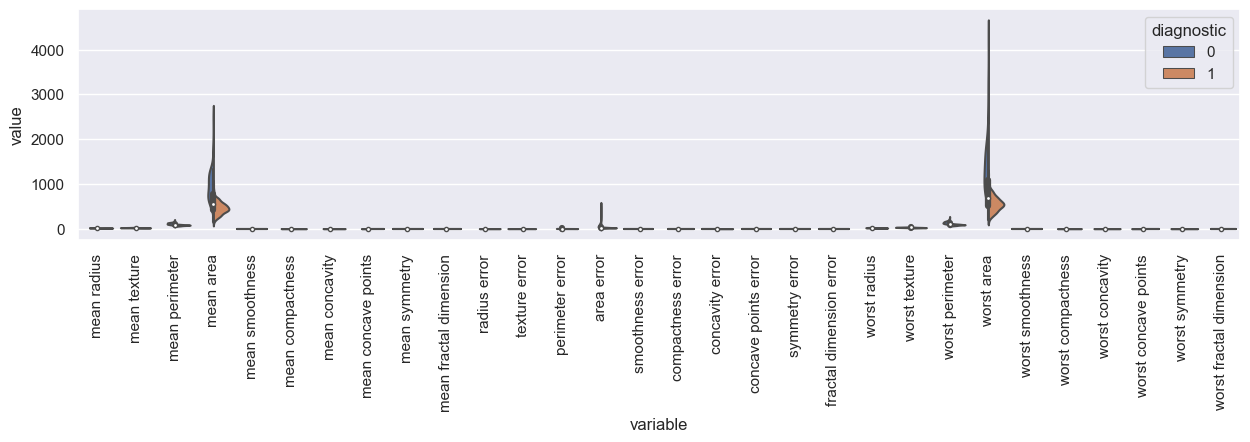

In [5]:
def violin_plot_cancer(df, cols=None):
    sns.set(rc={'figure.figsize':(15,3)})
    if cols!=None:
        data = df[cols+['diagnostic']]
    else: data = df
    data = pd.melt(data, id_vars='diagnostic')
    sns.violinplot( data, x='variable', y='value', hue='diagnostic', split=True, figsize=(5,30) )
    plt.xticks(rotation=90)
    plt.show()
    
    
violin_plot_cancer(df_cancer)

## A.1 Correlaciones

La correlación es una medida estadística que describe la relación entre dos variables. La correlación puede ser positiva, negativa o neutra, y su valor puede variar entre -1 y 1. Una correlación positiva significa que a medida que una variable aumenta, la otra variable también tiende a aumentar. Una correlación negativa significa que a medida que una variable aumenta, la otra variable tiende a disminuir. Una correlación neutra significa que no hay una relación aparente entre las dos variables.

El coeficiente de correlación de Pearson es la medida más comúnmente utilizada para calcular la correlación entre dos variables continuas. Este coeficiente varía entre -1 y 1, y se calcula dividiendo la covarianza de las dos variables por el producto de sus desviaciones estándar.

Otras medidas de correlación incluyen el coeficiente de correlación de rango de Spearman y el coeficiente de correlación de rango de Kendall, que son útiles cuando las variables no siguen una distribución normal o cuando hay valores atípicos en los datos.

Es importante tener en cuenta que la correlación no implica causalidad. Solo porque dos variables estén correlacionadas, no significa que una variable cause la otra. La correlación solo indica que hay una relación entre las dos variables. Revisen la página de [correlaciones espurias](https://www.tylervigen.com/spurious-correlations) para ejemplos de esto.

![Correlacion ciencia y suicidio](./images/correlation_not_causation.png)

Podemos calcular la correlación entre variables del conjunto de datos con la función de pandas `.corr()`. Por default se calcula la correlación de Pearson.

Visualicemos esto como un `clustermap`. Se recomienda usar una escala divergente y fijar los límites de -1 a 1 para facilitar la interpretación.

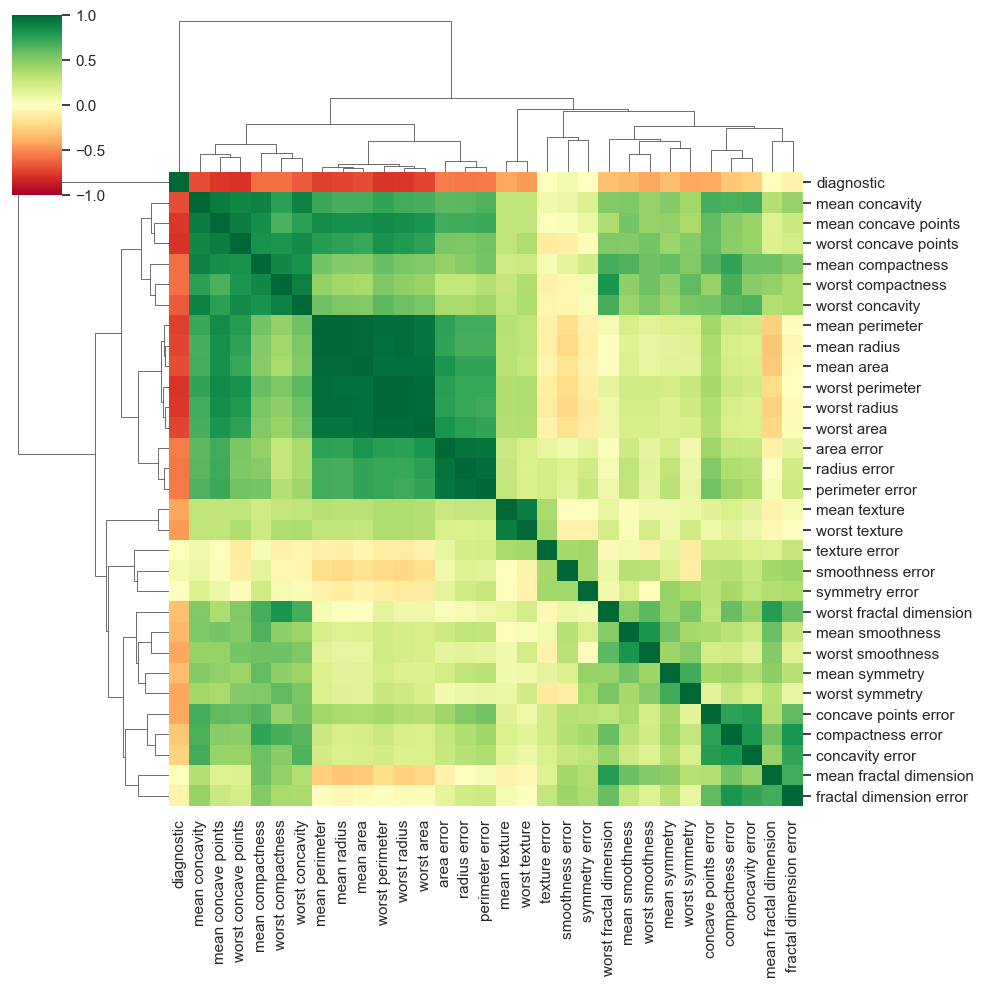

In [6]:
df_corr = df_cancer.corr()
df_corr

sns.clustermap( df_corr, cmap='RdYlGn', vmin=-1, vmax=1 )

### Correlaciones de datos categóricos

Para calcular la correlación entre variables categóricas, es necesario convertir estas variables a una representación numérica. Esto se puede hacer utilizando la técnica de codificación one-hot (también conocida como codificación de variables ficticias o dummy). La codificación one-hot convierte cada categoría en una variable binaria (1 si pertenece a la categoría, 0 si no) y luego calcula la correlación de Pearson entre estas variables binarias.

In [7]:
# Estos son datos de ejemplo
df_dummy = pd.DataFrame({
                         'sexo': ['M', 'F', 'M', 'F', 'M', 'M', 'F', 'F'],
                         'grupo_sanguineo': ['A', 'O', 'B', 'O', 'A', 'AB', 'B', 'O'],
                         'enfermedad': ['no', 'si', 'no', 'si', 'no', 'si', 'no', 'si']
                        })

# Convertir variables categóricas a variables binarias (one-hot encoding)
df_dummy_encoded = pd.get_dummies(df_dummy)
df_dummy_encoded

,sexo_F,sexo_M,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,enfermedad_no,enfermedad_si
0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,1,0,1
2,0,1,0,0,1,0,1,0
3,1,0,0,0,0,1,0,1
4,0,1,1,0,0,0,1,0
5,0,1,0,1,0,0,0,1
6,1,0,0,0,1,0,1,0
7,1,0,0,0,0,1,0,1


Ahora calculemos la correlación de estos datos codíficados. El resultado es una matriz de correlación que muestra la correlación entre todas las variables binarias.

<AxesSubplot: >

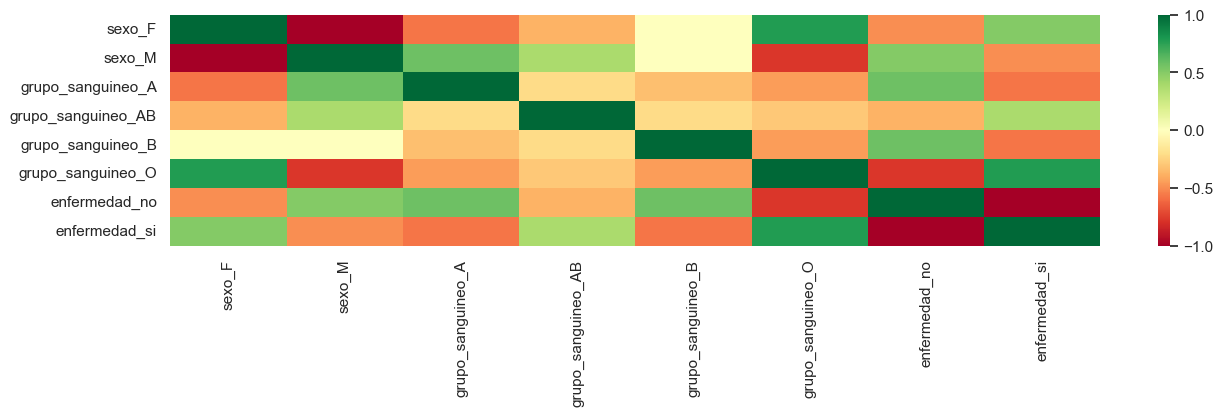

In [8]:
df_dummy_corr = df_dummy_encoded.corr()
df_dummy_corr
sns.heatmap( df_dummy_corr, cmap='RdYlGn', vmin=-1, vmax=1)

### Significancia estadística

El p-value o valor-p es una medida estadística que se utiliza para evaluar la significancia de una correlación o de cualquier otra prueba estadística. El p-value es la probabilidad de obtener un resultado al menos tan extremo como el que se observó, asumiendo que la hipótesis nula es verdadera. En otras palabras, el p-value nos indica qué tan probable es que la correlación observada se deba al azar o al azar y no a una verdadera relación entre las variables.

En el contexto de una correlación, si el p-value es menor que un nivel de significancia predeterminado (generalmente 0.05 o 0.01), se considera que la correlación es significativa y que la hipótesis nula (que no hay correlación) se debe rechazar. Por otro lado, si el p-value es mayor que el nivel de significancia, se considera que la correlación no es significativa y que no se puede rechazar la hipótesis nula.

![Significancia estadistica](./images/xkcd_significant.png)

Por ejemplo, para calcular la significancia estadística de una correlación es necesario usar la biblioteca `scipy` y la función `pearsonr`.nonono

In [9]:
#! pip install scipy
from scipy.stats import pearsonr

corr, p = pearsonr(df_cancer['mean perimeter'], df_cancer['mean fractal dimension'])
corr, p

(-0.2614769080663335, 2.388802772934627e-10)

## A.2 Selección univariada

Los métodos de selección univariada utilizan pruebas estadísticas para seleccionar las características que tienen una relación más fuerte con la variable objetivo. Algunos ejemplos de pruebas estadísticas son ANOVA, chi-cuadrado y correlación de Pearson. En scikit-learn, la clase `SelectKBest` se utiliza para seleccionar las k mejores características según una prueba estadística dada.

En este caso las variables que nos interesan son las mediciones experimentales, mientras que la variable objetivo es si es benigno o maligno.

In [15]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_cancer.drop('diagnostic', axis=1), df_cancer['diagnostic'])
selected_features = list(cancer['feature_names'][feature_selection.get_support()])
selected_features

['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']

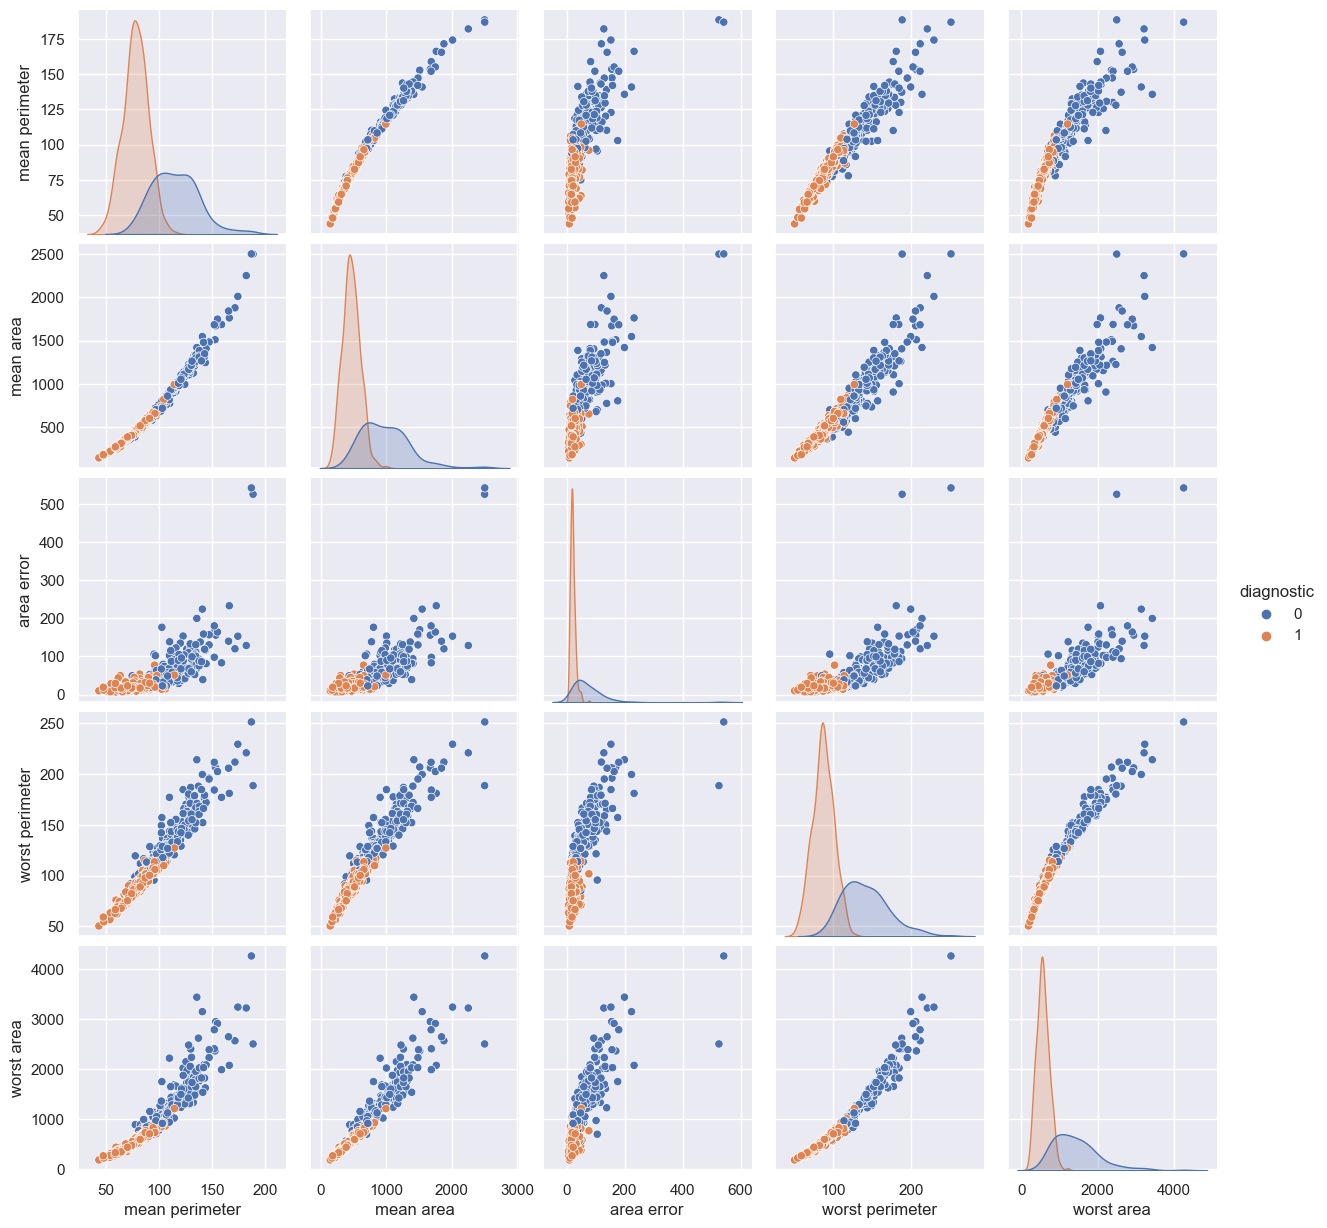

In [16]:
df_selected = df_cancer[ selected_features + ['diagnostic'] ]
sns.pairplot(df_selected, hue='diagnostic')

## A.3 Escala de los datos

Muchos análisis son sensibles a diferencias en las escalas de los datos. Si las variables no se miden en una escala similar, debemos escalar las características antes de ejecutar PCA para nuestros datos.

`StandardScaler` es una clase en la biblioteca scikit-learn de Python que se utiliza para escalar los datos a una media cero y una desviación estándar de uno. Esto significa que la media de los datos se desplaza a cero y la escala se ajusta para que la varianza sea la misma en todas las características.

In [17]:
from sklearn.preprocessing import StandardScaler

standardized = StandardScaler()
scaled_data = standardized.fit_transform( df_cancer.drop('diagnostic', axis=1) )
scaled_data

df_scaled = pd.DataFrame(data=scaled_data, columns=cancer['feature_names'])
df_scaled['diagnostic'] = cancer['target']
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


El resultado de la transformación es que las características tienen una distribución normalizada con media de cero y desviación estandar de uno. Además, la normalización ayuda a evitar que características con varianza alta dominen la importancia de otras características con varianza baja.

In [18]:
df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,...,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.627
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.484
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602,0.000
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692,0.000
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216,1.000
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451,1.000
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847,1.000


Graficando

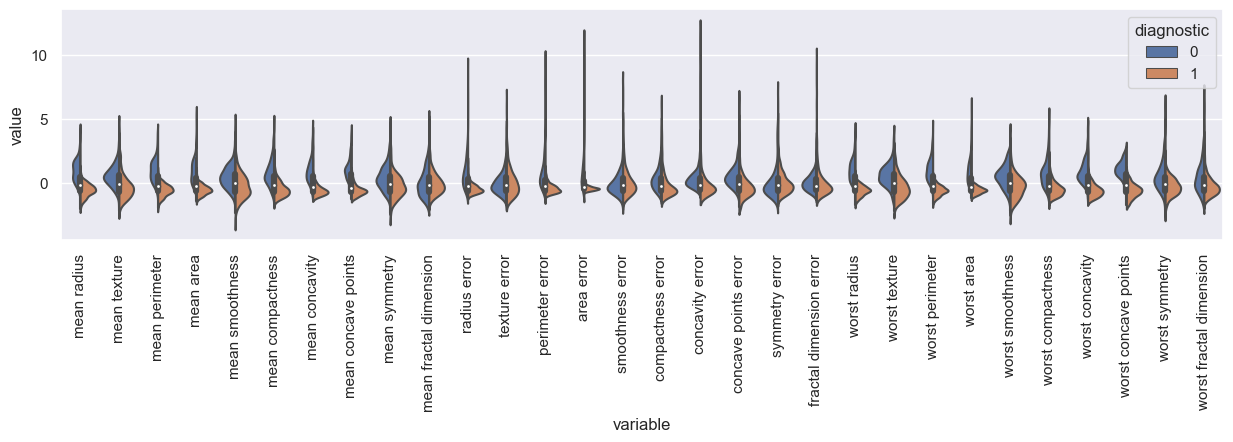

In [19]:
violin_plot_cancer(df_scaled)

## A.4 PCA (Análisis de Componentes Principales)

PCA (Análisis de Componentes Principales) es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos. El PCA busca encontrar las combinaciones lineales de las variables originales que expliquen la mayor cantidad posible de la variabilidad en los datos. Estas nuevas variables, llamadas componentes principales, se ordenan en función de la cantidad de varianza que explican en los datos.

La idea detrás del PCA es que, en muchos casos, los datos pueden estar altamente correlacionados entre sí y pueden ser redundantes en términos de información. Al reducir la dimensionalidad de los datos mediante el PCA, podemos eliminar esta redundancia y conservar solo las variables más informativas y significativas para el análisis. 
El PCA se aplica a un conjunto de datos de alta dimensionalidad, se calculan los componentes principales, y se utilizan estos componentes para realizar análisis más simples, como clasificación, regresión o visualización.
El PCA es una técnica no supervisada, es decir, no requiere etiquetas o información de respuesta para llevar a cabo la reducción de dimensionalidad.

El análisis de PCA regresa un objeto que contiene bastante información, algunos de los cuales:
* components_: los vectores de carga (o dirección) de cada componente principal en términos de las características originales.
* explained_variance_: la varianza explicada por cada componente principal.
* explained_variance_ratio_: la proporción de la varianza explicada por cada componente principal

Los componentes se ordenan de acuerdo a la canridad de varianza que explican. Se puede fijar cuantos componentes se quieren de regreso.

0.8473427431680602

In [30]:
from sklearn.decomposition import PCA

n_components = 5
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

for var_por, var, compon in zip(pca.explained_variance_ratio_, pca.explained_variance_, pca.components_):
    print("Varianza: {}%\nVarianza explicada: {}\nComponente: {}\n\n".format(var_por*100, var, compon.round(5)))
    
print("En total los primeros {} componentes explican el {}% de la varianza de los datos".format(n_components, pca.explained_variance_ratio_.sum()*100))

Varianza: 44.272025607526366%
Varianza explicada: 13.304990794374561
Componente: [0.2189  0.10372 0.22754 0.22099 0.14259 0.23929 0.2584  0.26085 0.13817
 0.06436 0.20598 0.01743 0.21133 0.20287 0.01453 0.17039 0.15359 0.18342
 0.0425  0.10257 0.228   0.10447 0.23664 0.22487 0.12795 0.2101  0.22877
 0.25089 0.1229  0.13178]


Varianza: 18.971182044033092%
Varianza explicada: 5.701374603726142
Componente: [-0.23386 -0.05971 -0.21518 -0.23108  0.18611  0.15189  0.06017 -0.03477
  0.19035  0.36658 -0.10555  0.08998 -0.08946 -0.15229  0.20443  0.23272
  0.19721  0.13032  0.18385  0.28009 -0.21987 -0.04547 -0.19988 -0.21935
  0.1723   0.14359  0.09796 -0.00826  0.14188  0.27534]


Varianza: 9.393163257431368%
Varianza explicada: 2.8229101550062228
Componente: [-0.00853  0.06455 -0.00931  0.0287  -0.10429 -0.07409  0.00273 -0.02556
 -0.04024 -0.02257  0.26848  0.37463  0.26665  0.21601  0.30884  0.15478
  0.17646  0.22466  0.28858  0.2115  -0.04751 -0.0423  -0.04855 -0.0119
 -0.2598  -0.2360

Para ver visualmente un PCA es necesario transformar los datos escalados para que roten y queden alineados con los ejes marcados por el PCA-

In [31]:
df_pca = pca.transform(df_scaled.drop('diagnostic', axis=1))
df_pca

/home/esther/anaconda3/envs/CursoPandas2023/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511023],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826387,  0.62177489],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208261, -0.17708526],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, -2.08922702,  1.80999127],
       [10.37479406,  1.67201011, -1.87702933, -2.35603114, -0.03374179],
       [-5.4752433 , -0.67063679,  1.49044308, -2.29915723, -0.18470239]])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# cargar datos
data = pd.read_csv('datos.csv')

# ajustar un objeto PCA
pca = PCA()
pca.fit(data)

# obtener los componentes principales y los loadings
components = pca.transform(data)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# crear un gráfico de dispersión biplot
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(components[:,0], components[:,1])
for i, variable in enumerate(data.columns):
    ax.quiver(0, 0, loadings[i,0], loadings[i,1], angles='xy', scale_units='xy', scale=1)
    ax.text(loadings[i,0]*1.2, loadings[i,1]*1.2, variable, color='red', ha='center', va='center')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
plt.show()

### Regresión logística

La regresión logística es una técnica de modelado estadístico que se utiliza para predecir la probabilidad de que ocurra un evento binario (sí o no, verdadero o falso) en función de una o más variables independientes. A diferencia de la regresión lineal, que se utiliza para predecir valores numéricos continuos, la regresión logística se utiliza para predecir una variable categórica.

En Python, se puede realizar una regresión logística utilizando la biblioteca Scikit-Learn. El siguiente es un ejemplo básico de cómo realizar una regresión logística en Python usando Scikit-Learn:

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Cargar el conjunto de datos de ejemplo
data = load_breast_cancer()

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Crear el objeto de regresión logística
modelo = LogisticRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo: {:.2f}%".format(precision * 100))

En este ejemplo, se utiliza el conjunto de datos de cáncer de mama de Wisconsin, que contiene información sobre diferentes características de las células del cáncer de mama. Primero, se separan los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split() de Scikit-Learn.

Luego, se crea un objeto de regresión logística utilizando la clase LogisticRegression() de Scikit-Learn. A continuación, se ajusta el modelo utilizando los datos de entrenamiento utilizando el método fit().

Después de ajustar el modelo, se utilizan los datos de prueba para realizar predicciones utilizando el método predict(). Luego, se calcula la precisión del modelo utilizando la función accuracy_score() de Scikit-Learn.

Finalmente, se imprime la precisión del modelo en la consola.

Es importante tener en cuenta que la regresión logística también tiene suposiciones y limitaciones, por lo que siempre es importante validar el modelo y realizar un análisis de los residuos para verificar la calidad del ajuste. Además, la selección de variables y la optimización de los hiperparámetros también son importantes para mejorar el rendimiento del modelo.